In [1]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics as sm



In [4]:
# file naam zodat de variabelen kunnen worden opgeroepen
variables = pd.read_csv('../Data/clean/sjv_post_jaar/outputelk14.csv', low_memory=False)

Y = variables[['sjve']]
X = variables[['postcode']]
# eventueel normaliseren
# X_norm = (X - X.mean()) / (X.max() - X.min())
# Y_norm = (Y - Y.mean()) / (Y.max() - Y.min())

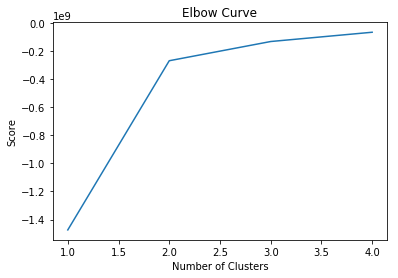

In [5]:
# Elbowcurve zodat het aantal clusters berekent kan worden
Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [6]:
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

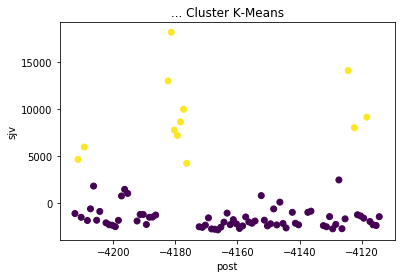

In [9]:
# clusteren
kmeans=KMeans(n_clusters=2)
kmeansoutput=kmeans.fit(Y)
kmeansoutput
pl.figure('.. Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('post')
pl.ylabel('sjv')
pl.title('... Cluster K-Means')
pl.show()